### Lab 4


### Linear Classifier


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from linear_classifier import LinearClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set style for better visualizations
# plt.style.use('seaborn')
# sns.set_palette("husl")

Importing Dataset

In [5]:
# Load the mushroom dataset
data = pd.read_csv('../data/2. Mushroom_dataset', header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [6]:
# The first column is the target (EDIBLE or POISONOUS)
# Convert target to binary (1 for EDIBLE, -1 for POISONOUS for margin loss)
le = LabelEncoder()
y = le.fit_transform(data[0])
y = 2 * y - 1  # Convert to {-1, 1}

# Convert categorical features to one-hot encoding
X = pd.get_dummies(data.drop(0, axis=1))
print(f"Dataset shape after one-hot encoding: {X.shape}")

Dataset shape after one-hot encoding: (8416, 117)


In [7]:
# Convert to numpy arrays
X = X.values
y = y.astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training

In [8]:
# Define training configurations
base_params = {
    'n_iter': 5000,
    'track_margins': True
}

configs = [
    {
        'name': 'Classic with L2',
        'params': {
            **base_params,
            'lr': 0.005,
            'lambda_': 0.95,
            'reg': 0.001,
            'momentum': False,
            'optimize_lr': False,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Classic with L2 + Nesterov',
        'params': {
            **base_params,
            'lr': 0.005,
            'lambda_': 0.95,
            'reg': 0.001,
            'momentum': True,
            'gamma': 0.9,
            'optimize_lr': False,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Classic with L2 + Nesterov + Optimal LR',
        'params': {
            **base_params,
            'lr': 0.01,
            'lambda_': 0.95,
            'reg': 0.001,
            'momentum': True,
            'gamma': 0.9,
            'optimize_lr': True,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
    'name': 'Multi-start Random Init',
    'params': {
        **base_params,
        'lr': 0.005,
        'lambda_': 0.95,
        'reg': 0.001,
        'momentum': True,
        'gamma': 0.9,
        'optimize_lr': False,
        'use_margins': False
    },
    'init_method': 'random',
    'use_multistart': True,
    'n_starts': 10  # Number of random initializations
}
]

# Advanced scenarios using the best base configuration
advanced_configs = [
    {
        'name': 'Correlation Init',
        'params': configs[1]['params'].copy(),  # Using Nesterov configuration
        'init_method': 'correlation'
    },
    {
        'name': 'Random Sampling',
        'params': {
            **configs[1]['params'],
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Margin-based Sampling',
        'params': {
            **configs[1]['params'],
            'use_margins': True
        },
        'init_method': 'random'
    }
]

results = {}


Training base configurations...

Training Classic with L2:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': False, 'optimize_lr': False, 'use_margins': False}


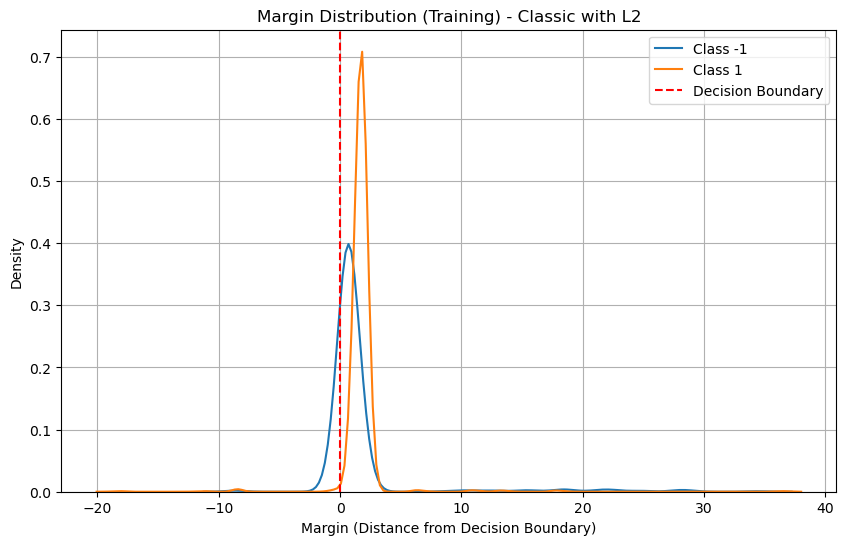


Margin Statistics:
Mean margin: 1.6513
Std margin: 3.4171
Min margin: -18.8393
Max margin: 36.7666
Median margin: 1.2347
Correctly classified rate: 0.9630


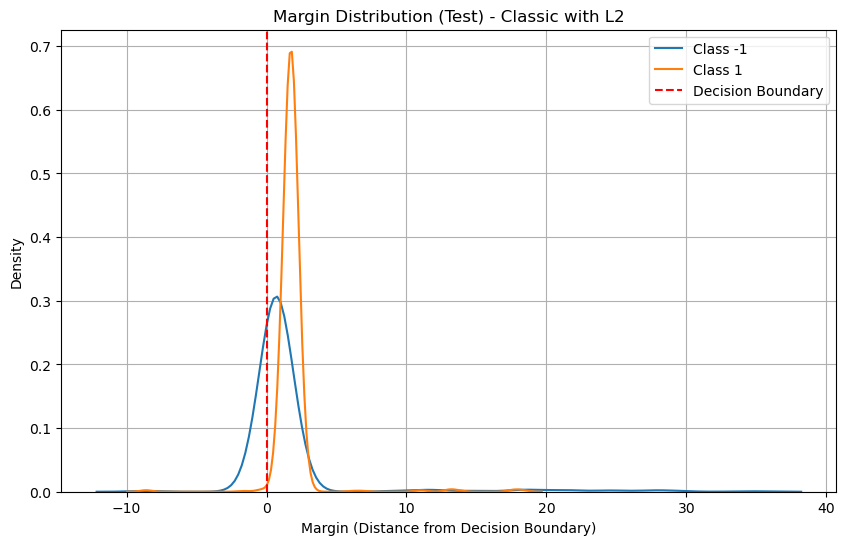


Margin Statistics:
Mean margin: 1.7139
Std margin: 3.4162
Min margin: -8.7548
Max margin: 34.8215
Median margin: 1.2701
Correctly classified rate: 0.9543

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9543

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9928     0.9214     0.9558        903
         1     0.9161     0.9923     0.9527        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

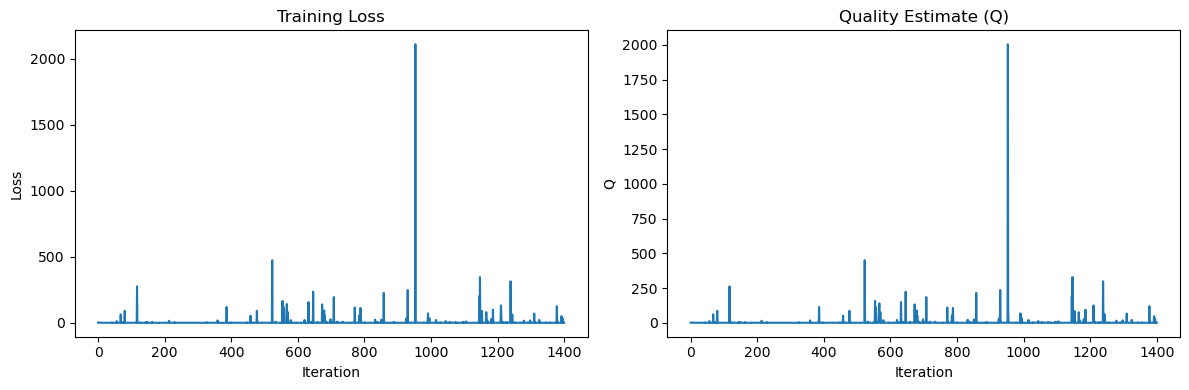

<Figure size 640x480 with 0 Axes>


Training Classic with L2 + Nesterov:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}


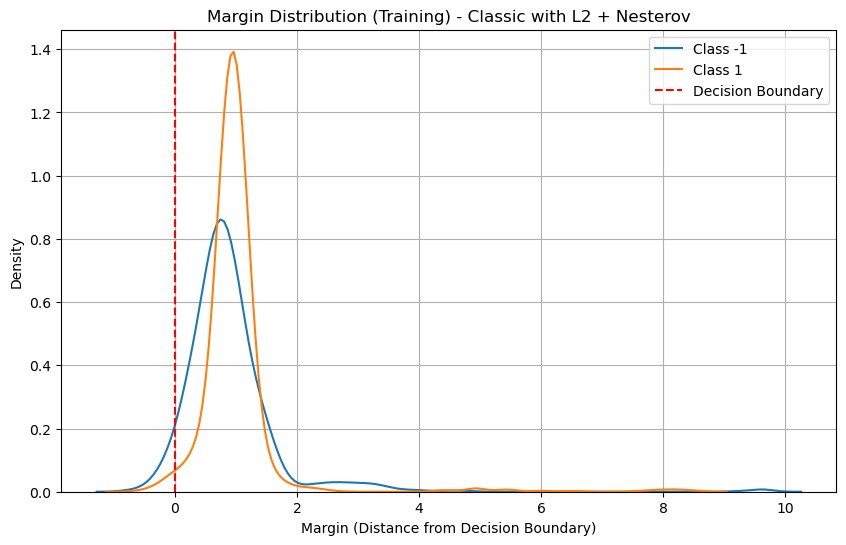


Margin Statistics:
Mean margin: 0.9467
Std margin: 0.8223
Min margin: -0.7951
Max margin: 9.7709
Median margin: 0.8816
Correctly classified rate: 0.9684


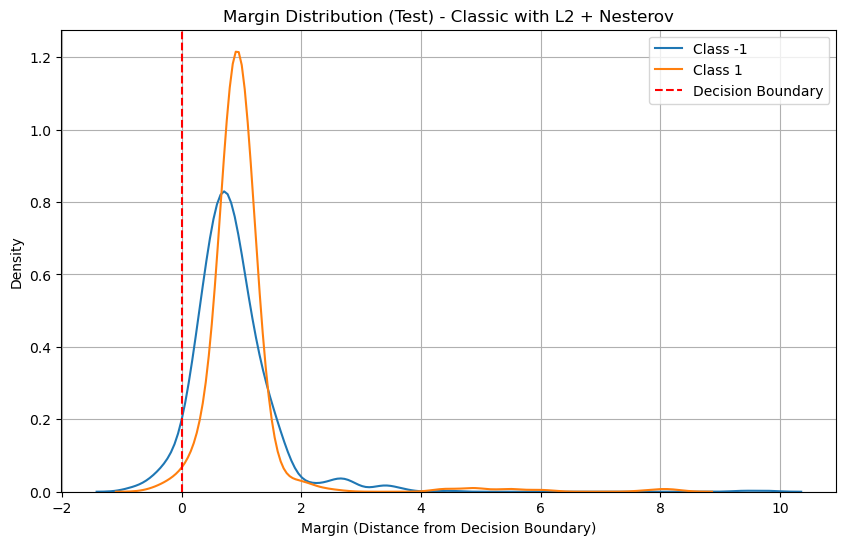


Margin Statistics:
Mean margin: 0.9263
Std margin: 0.7683
Min margin: -0.8499
Max margin: 9.7840
Median margin: 0.8630
Correctly classified rate: 0.9662

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9662

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9873     0.9491     0.9678        903
         1     0.9436     0.9859     0.9643        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

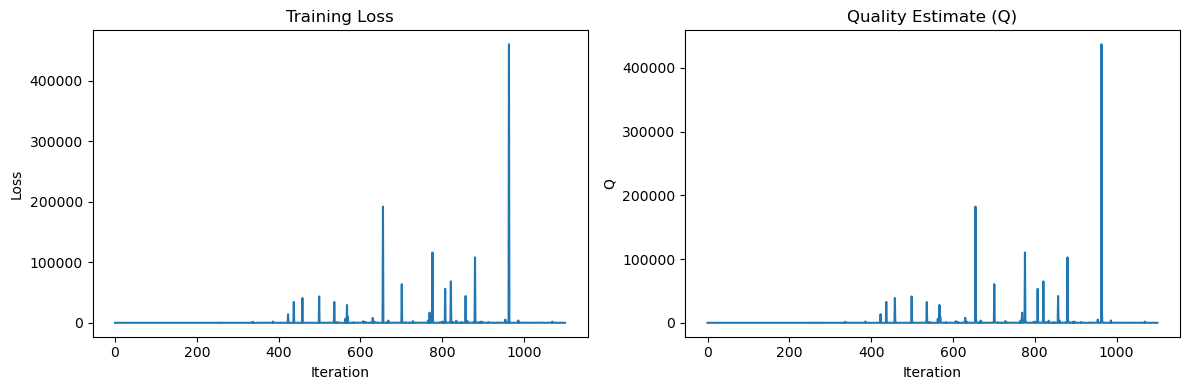

<Figure size 640x480 with 0 Axes>


Training Classic with L2 + Nesterov + Optimal LR:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.01, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': True, 'use_margins': False}


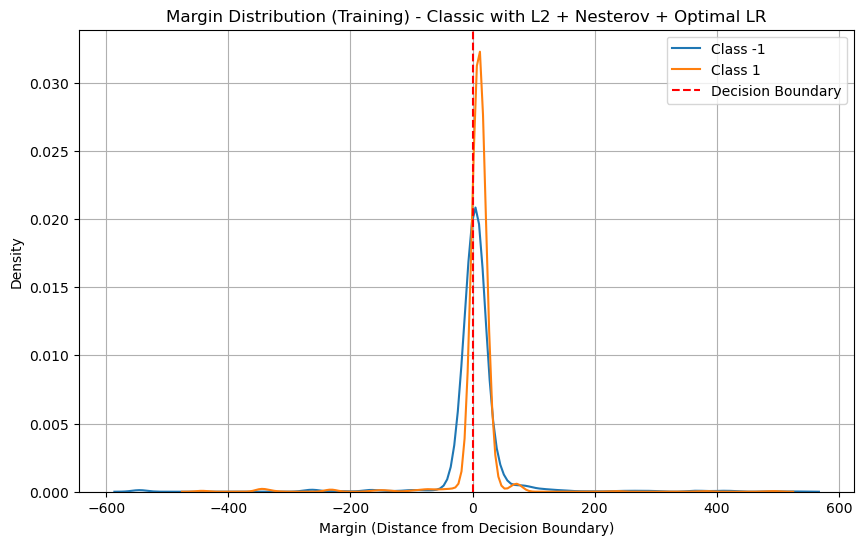


Margin Statistics:
Mean margin: 7.1027
Std margin: 55.1633
Min margin: -550.2731
Max margin: 531.0145
Median margin: 8.4587
Correctly classified rate: 0.7747


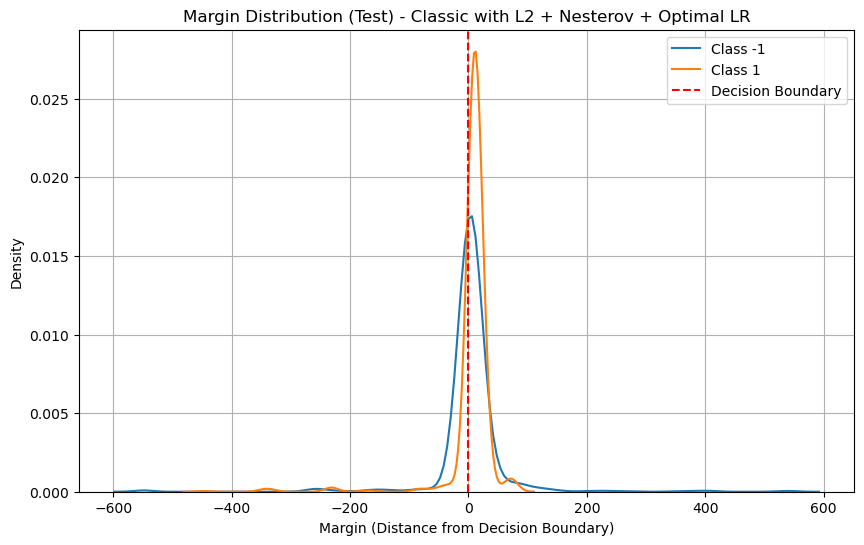


Margin Statistics:
Mean margin: 5.7361
Std margin: 54.1544
Min margin: -549.8013
Max margin: 543.9145
Median margin: 8.6232
Correctly classified rate: 0.7637

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.7637

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9040     0.6257     0.7395        903
         1     0.6808     0.9232     0.7837        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

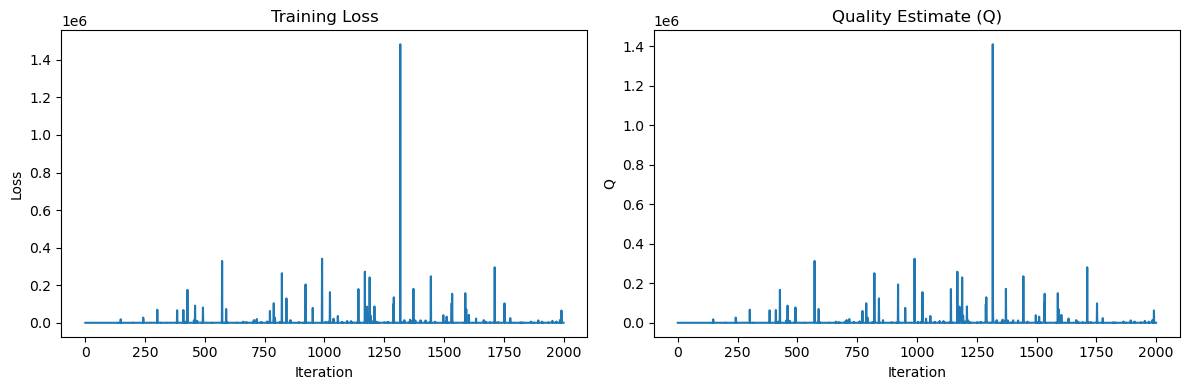

<Figure size 640x480 with 0 Axes>


Training Multi-start Random Init:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}
Performing 10 random initializations...
Start 1/10 - Test accuracy: 0.9186
New best score: 0.9186
Start 2/10 - Test accuracy: 0.9703
New best score: 0.9703
Start 3/10 - Test accuracy: 0.9614
Start 4/10 - Test accuracy: 0.9489
Start 5/10 - Test accuracy: 0.9620
Start 6/10 - Test accuracy: 0.9626
Start 7/10 - Test accuracy: 0.9614
Start 8/10 - Test accuracy: 0.9792
New best score: 0.9792
Start 9/10 - Test accuracy: 0.9768
Start 10/10 - Test accuracy: 0.9679


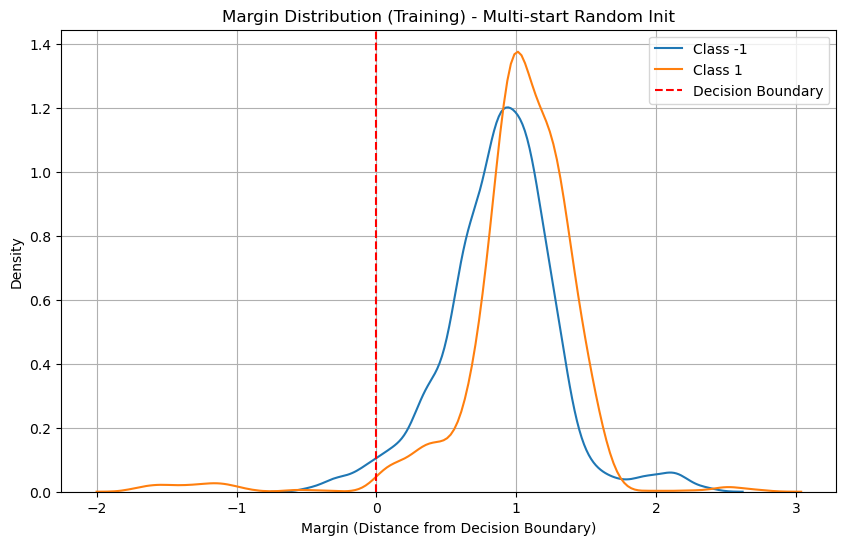


Margin Statistics:
Mean margin: 0.9414
Std margin: 0.4332
Min margin: -1.7264
Max margin: 2.7632
Median margin: 0.9807
Correctly classified rate: 0.9765


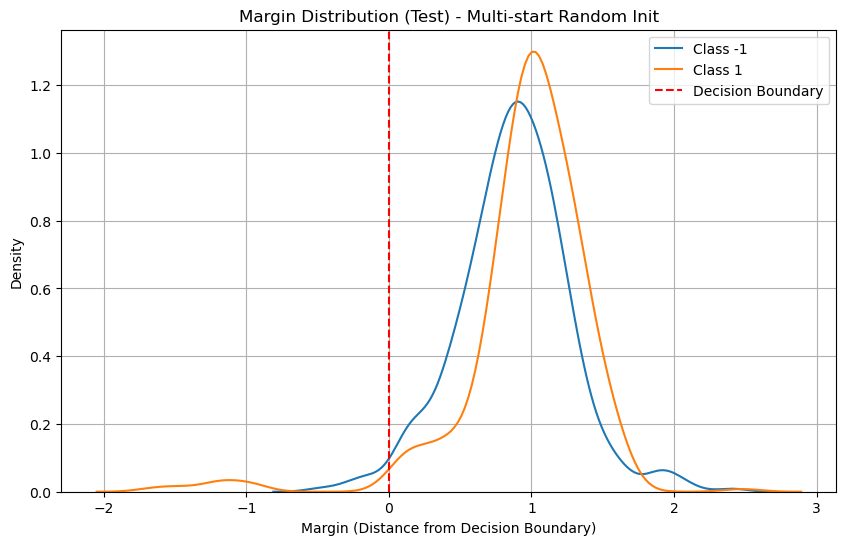


Margin Statistics:
Mean margin: 0.9147
Std margin: 0.4276
Min margin: -1.6845
Max margin: 2.5265
Median margin: 0.9560
Correctly classified rate: 0.9792

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9792

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9790     0.9823     0.9807        903
         1     0.9794     0.9757     0.9775        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

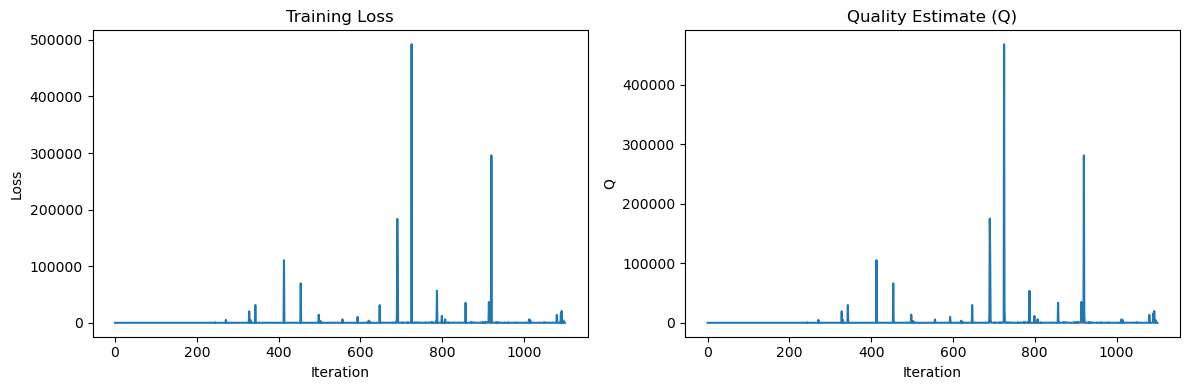

<Figure size 640x480 with 0 Axes>


Training advanced scenarios...

Training Correlation Init:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}


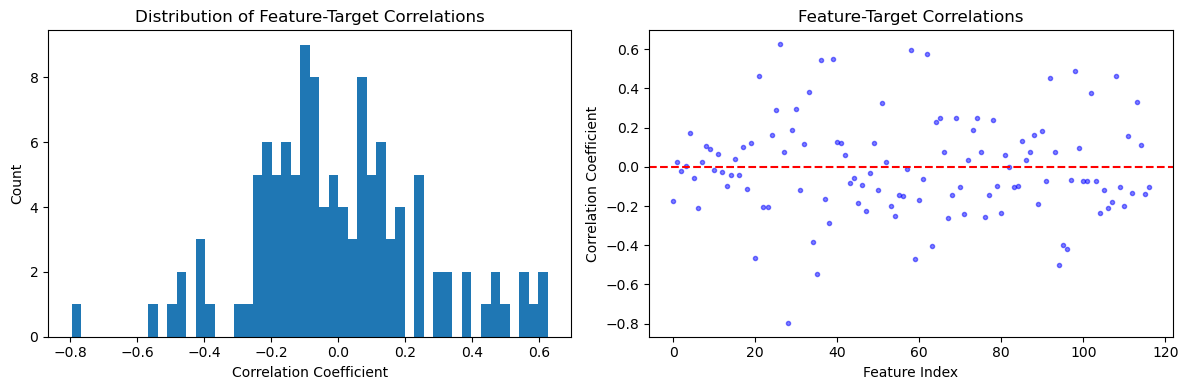


Correlation Statistics:
Mean absolute correlation: 0.1949
Max absolute correlation: 0.7957
Number of features with |correlation| > 0.1: 79


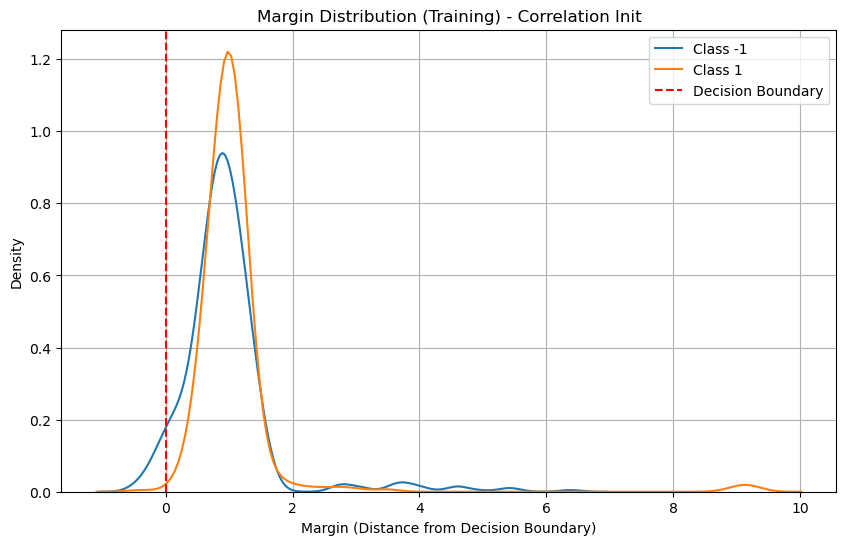


Margin Statistics:
Mean margin: 1.0174
Std margin: 0.8599
Min margin: -0.5804
Max margin: 9.4567
Median margin: 0.9399
Correctly classified rate: 0.9750


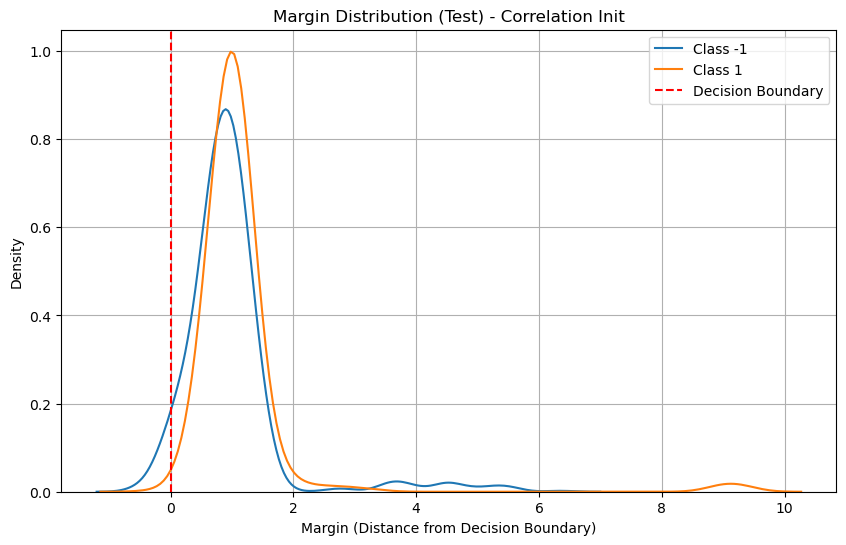


Margin Statistics:
Mean margin: 1.0489
Std margin: 0.9542
Min margin: -0.5539
Max margin: 9.4302
Median margin: 0.9538
Correctly classified rate: 0.9780

Best performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9780

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9988     0.9601     0.9791        903
         1     0.9559     0.9987     0.9768        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

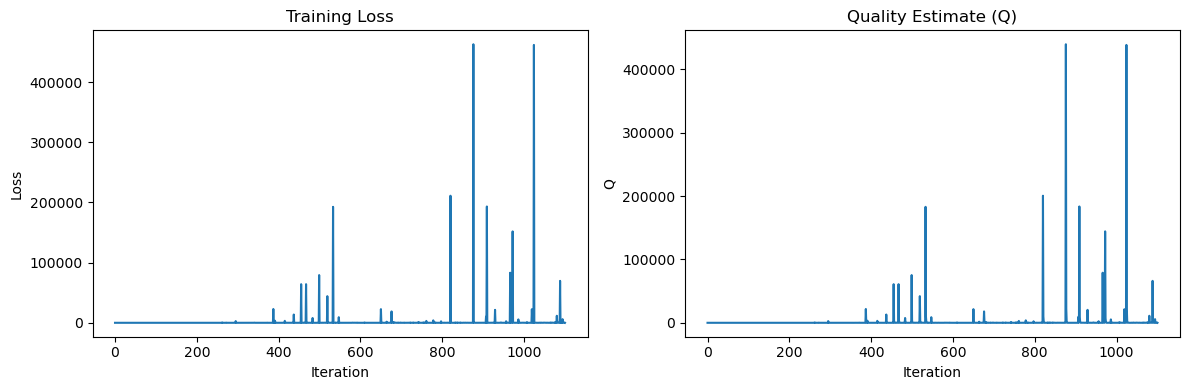

<Figure size 640x480 with 0 Axes>


Training Random Sampling:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}
Performing 5 runs...
Run 1 test accuracy: 0.9810
Run 2 test accuracy: 0.9792
Run 3 test accuracy: 0.9685
Run 4 test accuracy: 0.9531
Run 5 test accuracy: 0.8533

Best performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9810

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     1.0000     0.9646     0.9820        903
         1     0.9606     1.0000     0.9799        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

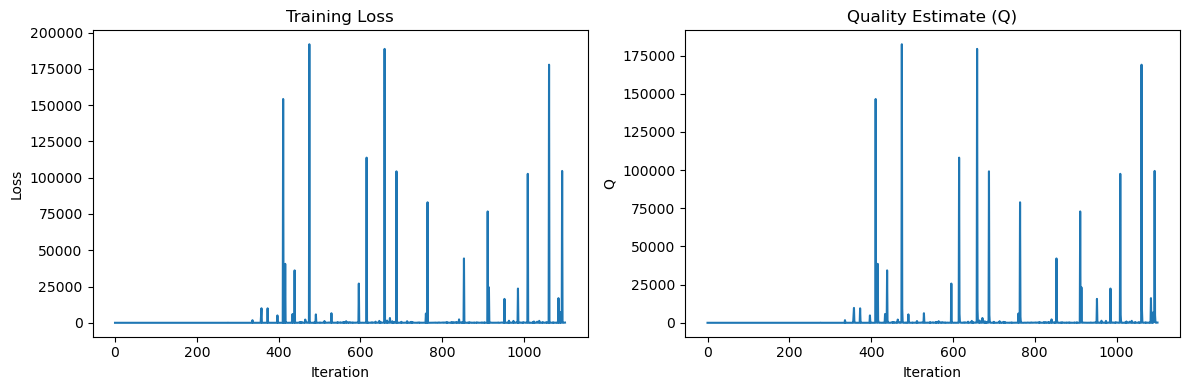

<Figure size 640x480 with 0 Axes>


Training Margin-based Sampling:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': True}
Performing 5 runs...
Run 1 test accuracy: 0.9982
Run 2 test accuracy: 0.9982
Run 3 test accuracy: 0.9988
Run 4 test accuracy: 0.9935
Run 5 test accuracy: 0.9994

Best performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9994

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9989     1.0000     0.9994        903
         1     1.0000     0.9987     0.9994        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

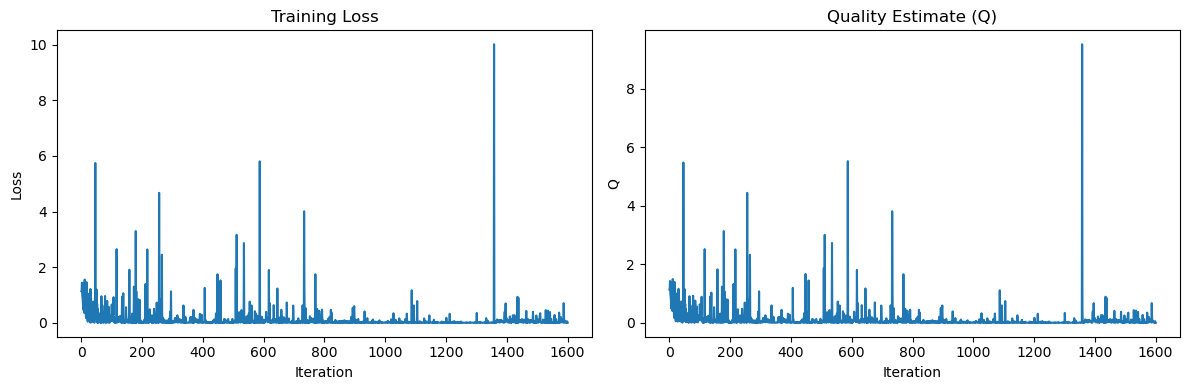

<Figure size 640x480 with 0 Axes>


Training reference implementation (SGDClassifier)...

Reference implementation performance:
------------------------------------------------------------
Training accuracy: 1.0000
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       903
         1.0       1.00      1.00      1.00       781

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



<Figure size 640x480 with 0 Axes>


Final Comparison:

Classic with L2:
------------------------------------------------------------
Training Accuracy: 0.9630
Test Accuracy: 0.9543

Classic with L2 + Nesterov:
------------------------------------------------------------
Training Accuracy: 0.9684
Test Accuracy: 0.9662

Classic with L2 + Nesterov + Optimal LR:
------------------------------------------------------------
Training Accuracy: 0.7747
Test Accuracy: 0.7637

Multi-start Random Init:
------------------------------------------------------------
Training Accuracy: 0.9765
Test Accuracy: 0.9792

Correlation Init:
------------------------------------------------------------
Training Accuracy: 0.9750
Test Accuracy: 0.9780

Random Sampling:
------------------------------------------------------------
Training Accuracy: 0.9868
Test Accuracy: 0.9810

Margin-based Sampling:
------------------------------------------------------------
Training Accuracy: 0.9999
Test Accuracy: 0.9994

Reference (SGD):
------------------------

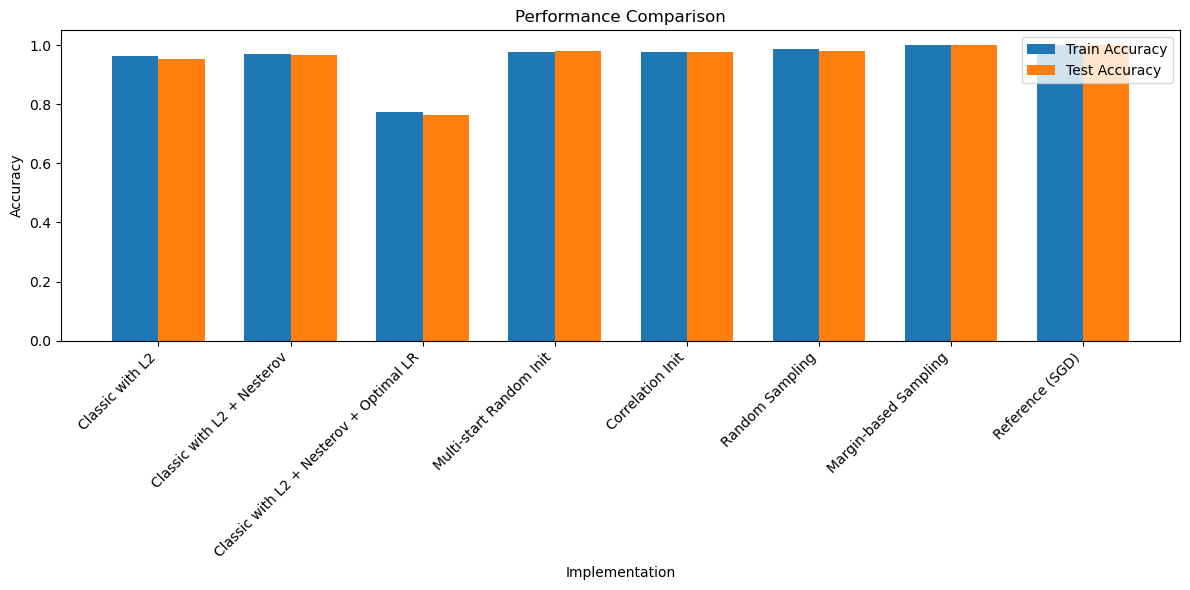

In [9]:


# Train and evaluate base configurations
print("\nTraining base configurations...")
for config in configs:
    print(f"\nTraining {config['name']}:")
    print("Parameters:", config['params'])
    
    if config.get('use_multistart', False):
        # Multi-start implementation
        n_starts = config.get('n_starts', 10)
        best_score = 0
        best_clf = None
        
        print(f"Performing {n_starts} random initializations...")
        for i in range(n_starts):
            clf = LinearClassifier(n_features=X_train_scaled.shape[1])
            clf.init_weights(method=config['init_method'])
            clf.fit(X_train_scaled, y_train, **config['params'])
            
            test_score = clf.score(X_test_scaled, y_test)
            print(f"Start {i+1}/{n_starts} - Test accuracy: {test_score:.4f}")
            
            if test_score > best_score:
                best_score = test_score
                best_clf = clf
                print(f"New best score: {best_score:.4f}")
        
        clf = best_clf  # Use the best classifier for results
    else:
        # Original single-start implementation
        clf = LinearClassifier(n_features=X_train_scaled.shape[1])
        clf.init_weights(method=config['init_method'])
        clf.fit(X_train_scaled, y_train, **config['params'])
    
    # Store results
    results[config['name']] = {
        'train_score': clf.score(X_train_scaled, y_train),
        'test_score': clf.score(X_test_scaled, y_test),
        'classifier': clf
    }

    clf.plot_margin_distribution(X_train_scaled, y_train, title=f"Margin Distribution (Training) - {config['name']}")
    clf.plot_margin_distribution(X_test_scaled, y_test, title=f"Margin Distribution (Test) - {config['name']}")
    
    # Print performance
    print(f"\nPerformance metrics:")
    clf.print_classification_report(X_test_scaled, y_test)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    clf.plot_training_history()
    plt.suptitle(f'Training Results: {config["name"]}')
    plt.tight_layout()
    plt.show()

# Train and evaluate advanced scenarios
print("\nTraining advanced scenarios...")
for config in advanced_configs:
    print(f"\nTraining {config['name']}:")
    print("Parameters:", config['params'])
    
    if config['name'] == 'Correlation Init':
        # Single run with correlation initialization
        clf = LinearClassifier(n_features=X_train_scaled.shape[1])
        clf.init_weights(method='correlation', X=X_train_scaled, y=y_train)
        clf.plot_feature_correlations()
        clf.fit(X_train_scaled, y_train, **config['params'])
        
        results[config['name']] = {
            'train_score': clf.score(X_train_scaled, y_train),
            'test_score': clf.score(X_test_scaled, y_test),
            'classifier': clf
        }

        clf.plot_margin_distribution(X_train_scaled, y_train, title=f"Margin Distribution (Training) - {config['name']}")
        clf.plot_margin_distribution(X_test_scaled, y_test, title=f"Margin Distribution (Test) - {config['name']}") 

    else:
        # Multiple runs for sampling strategies
        n_tries = 5
        best_score = 0
        best_clf = None
        
        print(f"Performing {n_tries} runs...")
        for i in range(n_tries):
            clf = LinearClassifier(n_features=X_train_scaled.shape[1])
            clf.init_weights(method=config['init_method'])
            clf.fit(X_train_scaled, y_train, **config['params'])
            
            test_score = clf.score(X_test_scaled, y_test)
            print(f"Run {i+1} test accuracy: {test_score:.4f}")
            
            if test_score > best_score:
                best_score = test_score
                best_clf = clf
        
        results[config['name']] = {
            'train_score': best_clf.score(X_train_scaled, y_train),
            'test_score': best_score,
            'classifier': best_clf
        }
    
    # Print performance
    print(f"\nBest performance metrics:")
    results[config['name']]['classifier'].print_classification_report(X_test_scaled, y_test)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    results[config['name']]['classifier'].plot_training_history()
    plt.suptitle(f'Training Results: {config["name"]}')
    plt.tight_layout()
    plt.show()

# Add reference implementation using SGDClassifier
print("\nTraining reference implementation (SGDClassifier)...")
ref_clf = SGDClassifier(
    loss='squared_hinge',  # Equivalent to quadratic loss
    penalty='l2',
    alpha=0.01,  # L2 regularization strength
    learning_rate='constant',
    eta0=0.01,  # Learning rate
    max_iter=5000,
    tol=1e-3,
    random_state=42
)

ref_clf.fit(X_train_scaled, y_train)

# Store reference results
results['Reference (SGD)'] = {
    'train_score': ref_clf.score(X_train_scaled, y_train),
    'test_score': ref_clf.score(X_test_scaled, y_test),
    'classifier': ref_clf
}

# Print reference performance
print("\nReference implementation performance:")
print("-" * 60)
print(f"Training accuracy: {results['Reference (SGD)']['train_score']:.4f}")
print(f"Test accuracy: {results['Reference (SGD)']['test_score']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, ref_clf.predict(X_test_scaled)))



plt.tight_layout()
plt.show()

# Print final comparison
print("\nFinal Comparison:")
print("=" * 80)
for name, result in results.items():
    print(f"\n{name}:")
    print("-" * 60)
    print(f"Training Accuracy: {result['train_score']:.4f}")
    print(f"Test Accuracy: {result['test_score']:.4f}")

# Plot comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results))

train_accs = [result['train_score'] for result in results.values()]
test_accs = [result['test_score'] for result in results.values()]

plt.bar(index - bar_width/2, train_accs, bar_width, label='Train Accuracy')
plt.bar(index + bar_width/2, test_accs, bar_width, label='Test Accuracy')

plt.xlabel('Implementation')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.xticks(index, list(results.keys()), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
